In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from healpy.newvisufunc import projview

import local_reversal

In [2]:
# Define model parameters 
R = 0.76 # integration distance
betaCW = 18 # vertical tilt angle of field below the reversal
betaCCW = -23 # vertical tilt angle of field above the reversal
x0 = 0.25 # distance to the reversal
neB = 0.04 # electron density times magnetic field strength

### Healpix map

In [30]:
# This is the coordinates for Healpix nside = 128
# change the nside to match your data

nside = 128
npix = hp.nside2npix(nside)
pixels = np.arange(npix)
theta, phi = hp.pix2ang(nside, pixels)
lat = 90.0 - np.degrees(theta)
long = np.degrees(phi)
inds = long > 180
long[inds] = long[inds] - 360

In [31]:
# Fill in a 1D healpix array with simulated Faraday depth values

map_hpx = np.array([local_reversal.phi_sim_full(long[n], lat[n],  R,  betaCW, betaCCW, x0, neB) for n in range(len(long))])

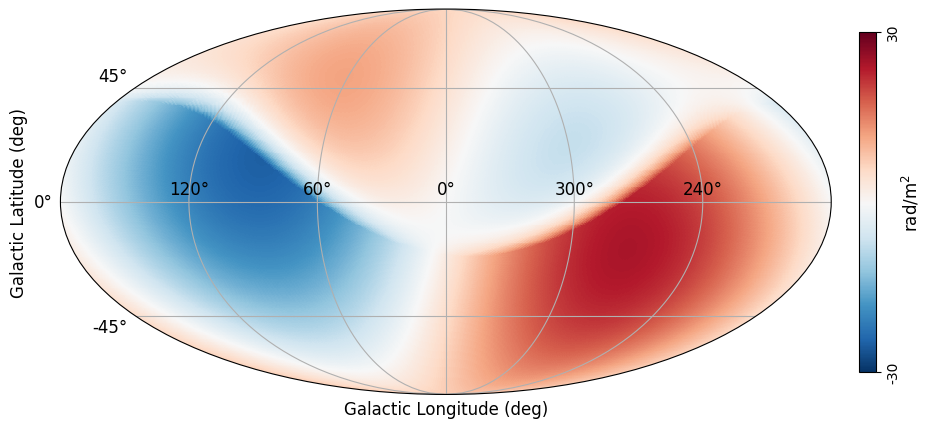

In [28]:
# plot the healpix map

projview(
    map_hpx,
    coord=["G"],
    cmap= plt.colormaps.get_cmap("RdBu_r").copy(),
    graticule=True,
    graticule_labels=True,
    unit="rad/m$^2$",
    xlabel="Galactic Longitude (deg)",
    ylabel="Galactic Latitude (deg)",
    cb_orientation="vertical",
    min=-30,
    max=30,
    latitude_grid_spacing=45,
    projection_type="mollweide",
    title="",
);

# 2D array

In [7]:
# set up the coordinates you want
# here I am using 1 degree pixels with a 181x361 (y vs x) 2D array 

longvals = np.linspace(-180, 180, 361)
latvals = np.linspace(-90, 90, 181)

ll, bb = np.meshgrid(longvals, latvals)


In [16]:
ll.max()

180.0

In [18]:
# fill in the 2d map with simulated M1 values

map_2d = np.zeros(ll.shape)

for m in range(181):
    for n in range(361):

        long = ll[m, n]
        lat = bb[m, n]

        temp = local_reversal.phi_sim_full(long, lat,  R,  betaCW, betaCCW, x0, neB)

        map_2d[m, n] = temp

Text(0, 0.5, 'Galactic latitude (deg)')

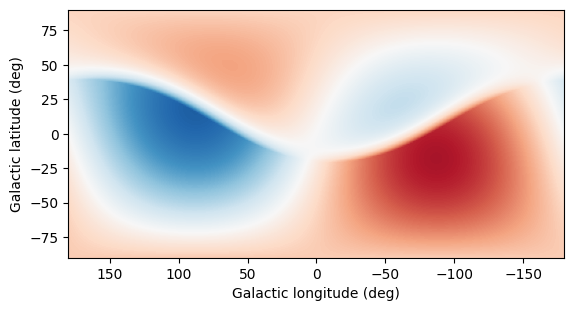

In [27]:
# plot the map

plt.imshow(map_2d, origin = "lower", extent = (longvals[0], longvals[-1], latvals[0], latvals[-1]), cmap = "RdBu_r", vmin = -30, vmax = 30)

plt.xlim(180, -180)
plt.ylim(-90, 90)

plt.xlabel("Galactic longitude (deg)")
plt.ylabel("Galactic latitude (deg)");